In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import numpy as np
from scipy.constants import c, hbar, elementary_charge

### Parameters of the quantum field ###
sigma = 53e-12                 # Detector Smearing [m]

Ksig = 16/sigma                    # Determines UV Cutoff [m^-1]
a = np.pi/Ksig      # Lattice spacing induced by UV Cutoff [m]
LatticeLength = 457         # Determines IR Cutoff [a]
mcc = 1                     # Field mass [eV]
wD = 130                    # Detector gap [eV]
lam = 130                   # Coupling energy [eV]

### Units used are hbar = c = a = 1 ###
q = elementary_charge
E0 = hbar*c/(q*a)   # Energy unit

### Unitless Parameters ###
sigma = sigma/a           # Normalized Smearing
mcc = mcc/E0               # Normalized Field Mass
wD = wD/E0                 # Normalized Detector Gap   
lam = lam/E0               # Normalized Coupling Energy

### Measurement Options ###
dt= 1e-18             # Duration of each measurement window [s]
Tmin = 0           # Start of first measurement window   [s]
Tmax = 25e-18      # End of last measurement window      [s]

# convert to units hbar = c = a = 1
Tmin *= c/a
Tmax *= c/a
dt *= c/a


In [3]:
import os
os.chdir("..")
from utils.Utilities import *
os.chdir("..")
cwd = os.getcwd() 

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
def get_csv(cwd, case_string, csv_title):
    os.chdir(cwd + '\\' + case_string)
    data = pd.read_csv(csv_title + '.csv')
    os.chdir('..')
    return data

In [5]:
data = get_csv(cwd, 'Reproduction_boundary_sensing', 'BinaryStats')
data_signal = get_csv(cwd, 'Reproduction_boundary_sensing_signal', 'BinaryStats')

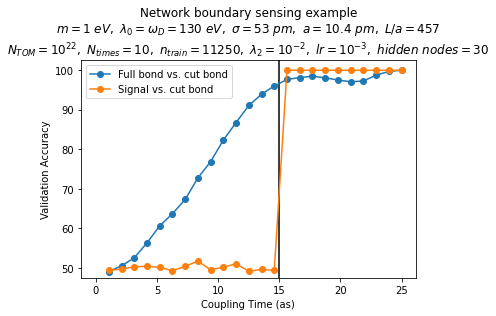

In [6]:
fig, ax = plt.subplots()
ax.plot((LatticeLength - 5*sigma)*a/c * 1e18 * np.ones(2), [40, 110], c='black')

for d, title in zip([data, data_signal], ['Full bond vs. cut bond', 'Signal vs. cut bond']):
    accuracy = d.loc[0, :].values[1:]
    
    times = (np.asarray(d.loc[0, :].index, dtype=float)*(a/c))[1:]
    ax.plot(times*1e18, accuracy*1e2, linestyle='-', marker='o', label=title)

ax.set_xlabel('Coupling Time (as)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Network boundary sensing example' \
    + '\n$m=1~eV,~\lambda_0=\omega_D=130~eV,~\sigma=53~pm,~a=10.4~pm,~L/a = 457$'\
    + '\n$N_{TOM}=10^{22},~N_{times}=10,~n_{train}=11250,~\lambda_2=10^{-2},~lr=10^{-3},~hidden~nodes=30$')
ax.set_ylim(47.5, 102.5)
ax.set_xlim(-1.25, 26.15)
ax.legend()

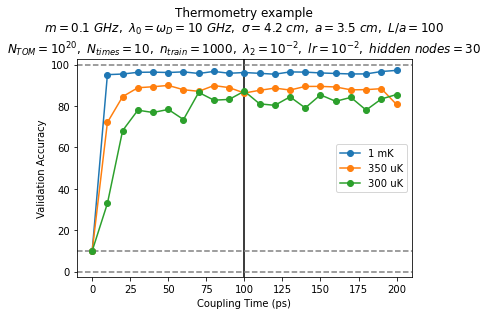

In [7]:
data = get_csv(cwd, 'Reproduction_temperature_sensing_1_mK_FINAL', 'BinaryStats')



fig, ax = plt.subplots()
ax.plot(100*np.ones(2), [-20, 120], c='black')
ax.plot([-10, 220], 100*np.ones(2), c='grey', linestyle='--')
ax.plot([-10, 220], np.zeros(2), c='grey', linestyle='--')
ax.plot([-10, 220], 10*np.ones(2), c='grey', linestyle='--')

for d, title in zip(['Reproduction_temperature_sensing_1_mK_FINAL', 'Reproduction_temperature_sensing_350_uK_FINAL', 'Reproduction_temperature_sensing_300_uK_FINAL'], 
    ['1 mK', '350 uK', '300 uK']):
    data = get_csv(cwd, d, 'BinaryStats')
    accuracy = np.asarray([0.10] + list(data.loc[3, :].values[1:]))
    
    times = (np.asarray(data.loc[0, :].index, dtype=float)*(6.287535065855046e-11))
    ax.plot(times*1e12, accuracy*1e2, linestyle='-', marker='o', label=title)

ax.set_xlabel('Coupling Time (ps)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Thermometry example' \
    + '\n$m=0.1~GHz,~\lambda_0=\omega_D=10~GHz,~\sigma=4.2~cm,~a=3.5~cm,~L/a = 100$'\
    + '\n$N_{TOM}=10^{20},~N_{times}=10,~n_{train}=1000,~\lambda_2=10^{-2},~lr=10^{-2},~hidden~nodes=30$')
ax.set_ylim(-2.5, 102.5)
ax.set_xlim(-10, 210)
ax.legend()

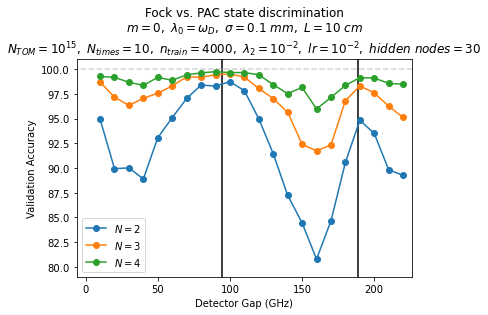

In [17]:
fig, ax = plt.subplots()
ax.plot(94.2*np.ones(2), [-20, 120], c='black')
ax.plot(2*94.2*np.ones(2), [-20, 120], c='black')
ax.plot([-20, 320], 100*np.ones(2), c='lightgrey', linestyle='--')

for N in [2, 3, 4]:
    data = get_csv(cwd, 'Fock_vs_PAC_' + str(N), 'BinaryStats')
    accuracy = np.asarray(list(data.loc[0, :]))
    times = (np.asarray(data.loc[0, :].index, dtype=float))
    ax.plot(times*c/a*1e-9, accuracy*1e2, linestyle='-', marker='o', label=r'$N='+str(N)+'$')

ax.set_xlabel('Detector Gap (GHz)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Fock vs. PAC state discrimination' \
    + '\n$m=0,~\lambda_0=\omega_D,~\sigma=0.1~mm,~L=10~cm$'\
    + '\n$N_{TOM}=10^{15},~N_{times}=10,~n_{train}=4000,~\lambda_2=10^{-2},~lr=10^{-2},~hidden~nodes=30$')
ax.set_ylim(79, 101)
ax.set_xlim(-6, 226)
ax.legend()

Text(0.5, 1.0, 'Mass order of magnitude classification\n$L=100a, K=16/\\sigma, \\sigma=0.1~mm, \\lambda=\\omega_D=50~GHz, T=200~\\mu K$\n$m_\\phi \\sim 5x 10^{-2}~GHz - 5x 10^{6}~GHz$')

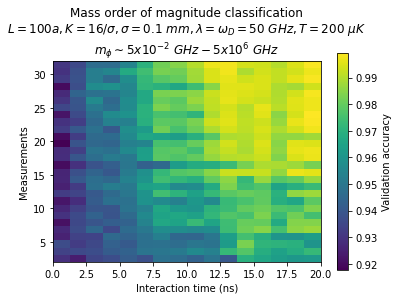

In [18]:

# concatenating data gathered seperately
p2 = get_csv(cwd, 'mass_regression_FINAL_17_32', 'BinaryStats')
data2 = np.array(p2)[:, 3:]
p1 = get_csv(cwd, 'mass_regression_FINAL', 'BinaryStats')
data1 = np.array(p1)[3:, 3:]
p3 = get_csv(cwd, 'mass_regression_FINAL_1e-8_2e-8', 'BinaryStats')
p3 = get_csv(cwd, 'mass_regression_FINAL_1e-8_2e-8', 'BinaryStats')
data3 = np.array(p3)[:, 3:]
p4 = get_csv(cwd, 'mass_regression_FINAL_2_16_1e-8_2e-8', 'BinaryStats')
data4 = np.array(p4)[3:, 3:]

data = np.concatenate([data1, data2])
datap = np.concatenate([data4, data3])

data = np.concatenate([data, datap], axis=1)
plt.imshow((np.flipud(data)), extent=[0, 20, 2, 32], aspect=0.5)
plt.colorbar(label='Validation accuracy')
plt.xlabel('Interaction time (ns)')
plt.ylabel('Measurements')
plt.title('Mass order of magnitude classification' + \
    '\n$L=100a, K=16/\sigma, \sigma=0.1~mm, \lambda=\omega_D=50~GHz, T=200~\mu K$' + \
    '\n$m_\phi \sim 5x 10^{-2}~GHz - 5x 10^{6}~GHz$')

Text(0.5, 1.0, 'Mass sensing through regression\n$L=100a,~~K=16/\\sigma,~~\\sigma=18~mm$\n$\\lambda=\\omega_D=10~GHz,~~T=200~\\mu K$\n$m_\\phi= 0.1~GHz \\pm 5\\%,~~~m_{DEV} = 0.01m_\\phi$')

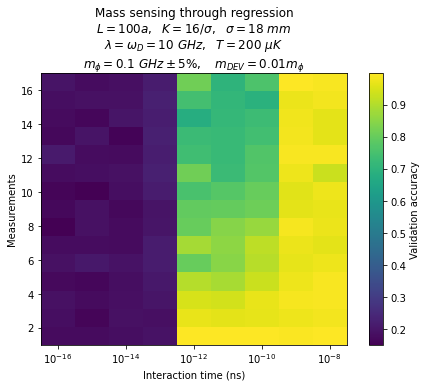

In [11]:
p = get_csv(cwd, 'mass_regression_FINALFINAL', 'BinaryStats')
data = np.array(p)[:, 1:]
phi = (1 + np.sqrt(5))/2
fig, ax = plt.subplots(figsize=(5*phi, 5))

im = ax.imshow((np.flipud(data)), extent=[-16.5, -7.5, 1, 17], aspect=0.5)
fig.colorbar(im, label='Validation accuracy')
ax.set_xlabel('Interaction time (ns)')
ax.set_ylabel('Measurements')

ax.set_xticks([i for i in range(-16, -7, 2)])
ax.set_xticklabels(['$10^{' + str(i) + '}$' for i in range(-16, -7, 2)])

ax.set_yticks([i for i in range(2, 17, 2)])

plt.title('Mass sensing through regression' + \
    '\n$L=100a,~~K=16/\sigma,~~\sigma=18~mm$' + \
    '\n$\lambda=\omega_D=10~GHz,~~T=200~\mu K$' + \
    '\n$m_\phi= 0.1~GHz \pm 5\%,~~~m_{DEV} = 0.01m_\phi$')

Text(0.5, 1.0, 'Smearing order of magnitude classification\n$L=100a, K=16/\\sigma, m_\\phi=500~GHz, \\lambda=\\omega_D=50~GHz, T=200~\\mu K$\n$ \\sigma \\sim 10^{-9}~-10^{-1}~m$')

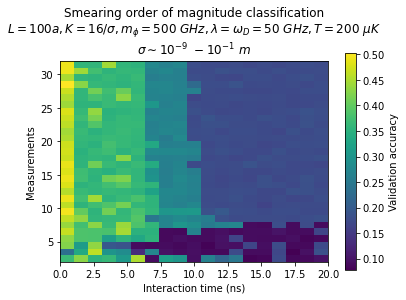

In [19]:
p = get_csv(cwd, 'sigma_regression', 'BinaryStats')
data = np.array(p)[:-1, 1:]

plt.imshow((np.flipud(data)), extent=[0, 20, 2, 32], aspect=0.5)
plt.colorbar(label='Validation accuracy')
plt.xlabel('Interaction time (ns)')
plt.ylabel('Measurements')
plt.title('Smearing order of magnitude classification' + \
    '\n$L=100a, K=16/\sigma, m_\phi=500~GHz, \lambda=\omega_D=50~GHz, T=200~\mu K$' + \
    '\n$ \sigma \sim 10^{-9}~-10^{-1}~m$')

Text(0.5, 1.0, 'Smearing order of magnitude classification\n$L=100a, K=16/\\sigma, m_\\phi=500~GHz, \\lambda=\\omega_D=50~GHz, T=200~\\mu K$\n$ \\sigma \\sim 10^{-9}~-10^{-1}~m$')

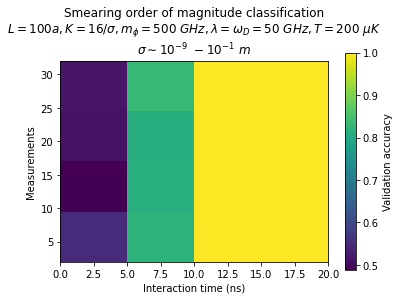

In [14]:

p = get_csv(cwd, 'smearing_classification', 'BinaryStats')
data = np.array(p)[:, 1:]

plt.imshow((np.flipud(data)), extent=[0, 20, 2, 32], aspect=0.5)
plt.colorbar(label='Validation accuracy')
plt.xlabel('Interaction time (ns)')
plt.ylabel('Measurements')
plt.title('Smearing order of magnitude classification' + \
    '\n$L=100a, K=16/\sigma, m_\phi=500~GHz, \lambda=\omega_D=50~GHz, T=200~\mu K$' + \
    '\n$ \sigma \sim 10^{-9}~-10^{-1}~m$')

Text(0, 0.5, 'Validation accuracy')

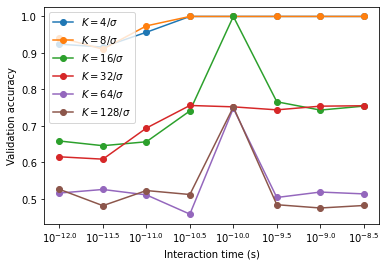

In [64]:
fig, ax = plt.subplots()

for K in [4, 8, 16, 32, 64, 128]:
    p = get_csv(cwd, 'smearing_classification_K_'+str(K), 'BinaryStats')
    data = np.array(p)[:, 1:]
    plt.plot(data[0], label='$K='+str(K)+'/\sigma$', linestyle='-', marker='o')

sigma = 10*1e-6 # [m]
Kc = K*c/sigma
a = np.pi/Kc * c
t0 = a/c

times = (np.asarray(p.loc[0, :].index, dtype=float))*t0
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(['$10^{' + str(i/2) + '}$' for i in range(-24, -16)])
ax.legend()
plt.xlabel('Interaction time (s)')
plt.ylabel('Validation accuracy')


Text(0, 0.5, 'Validation accuracy')

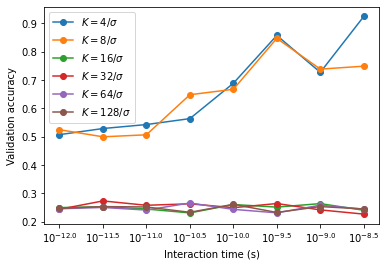

In [65]:
fig, ax = plt.subplots()

for K in [4, 8, 16, 32, 64, 128]:
    p = get_csv(cwd, 'cutoff_classification_K_'+str(K), 'BinaryStats')
    data = np.array(p)[:, 1:]
    plt.plot(data[0], label='$K='+str(K)+'/\sigma$', linestyle='-', marker='o')

sigma = 10*1e-6 # [m]
Kc = K*c/sigma
a = np.pi/Kc * c
t0 = a/c

times = (np.asarray(p.loc[0, :].index, dtype=float))*t0
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(['$10^{' + str(i/2) + '}$' for i in range(-24, -16)])
ax.legend()
plt.xlabel('Interaction time (s)')
plt.ylabel('Validation accuracy')
